In [1]:
!pip install mediapipe opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [2]:
from google.colab import files
uploaded = files.upload()


Saving istockphoto-1489370210-640_adpp_is.mp4 to istockphoto-1489370210-640_adpp_is.mp4


In [3]:
import cv2
import mediapipe as mp
from IPython.display import display, Video

In [10]:
from PIL import Image

In [4]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils


In [5]:
video_path = list(uploaded.keys())[0]
cap = cv2.VideoCapture(video_path)


In [7]:
with mp_hands.Hands(
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:

    # Initialize output_frames as a list to store the processed frames
    output_frames = []

    while cap.isOpened():
        success, image = cap.read()
        if not success:
            break

        # Convert the BGR image to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Process the image and find hands
        results = hands.process(image)

        # Convert the image color back so it can be displayed
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw hand landmarks
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # Display the image (you can save it to a video file or show it in Colab)
        # For this example, we'll save the frames to a list and create a video at the end
        output_frames.append(image)

cap.release()

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [14]:
output_path = 'output_hand_tracking.mp4'

In [17]:
if output_frames:
    output_path = 'output_hand_tracking.mp4'
    out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 20, (output_frames[0].shape[1], output_frames[0].shape[0]))

    for frame in output_frames:
        out.write(frame)

    out.release()
    print(f"Video saved to {output_path}")
else:
    print("No frames were processed. Check your video file.")

Video saved to output_hand_tracking.mp4


In [18]:
display(Video(output_path, embed=True))

In [ ]:
display(Video(output_path, embed=True))

In [8]:
output_frames

[array([[[141, 138, 137],
         [141, 138, 137],
         [141, 138, 137],
         ...,
         [141, 138, 137],
         [141, 138, 137],
         [141, 138, 137]],
 
        [[141, 138, 137],
         [141, 138, 137],
         [141, 138, 137],
         ...,
         [141, 138, 137],
         [141, 138, 137],
         [141, 138, 137]],
 
        [[141, 138, 137],
         [141, 138, 137],
         [141, 138, 137],
         ...,
         [141, 138, 137],
         [141, 138, 137],
         [141, 138, 137]],
 
        ...,
 
        [[146, 141, 140],
         [146, 141, 140],
         [146, 141, 140],
         ...,
         [137, 141, 143],
         [127, 131, 133],
         [117, 121, 123]],
 
        [[146, 141, 140],
         [146, 141, 140],
         [146, 141, 140],
         ...,
         [144, 148, 150],
         [142, 146, 148],
         [137, 141, 143]],
 
        [[146, 141, 140],
         [146, 141, 140],
         [146, 141, 140],
         ...,
         [147, 151, 153],
  

In [19]:
output_path1 = 'output_hand_tracking.mp4'
frame_height, frame_width, _ = output_frames[0].shape
out = cv2.VideoWriter(output_path1, cv2.VideoWriter_fourcc(*'mp4v'), 20, (frame_width, frame_height))

In [20]:
for frame in output_frames:
    out.write(frame)

out.release()

In [21]:
display(Video(output_path, embed=True))


In [22]:
def display_frames(frames, num_frames=5):
    plt.figure(figsize=(15, 10))
    for i in range(min(num_frames, len(frames))):
        plt.subplot(1, num_frames, i + 1)
        plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

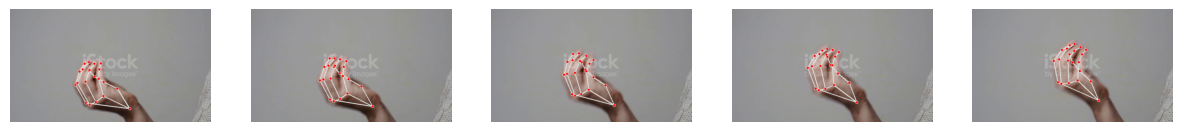

In [25]:
display_frames(output_frames, num_frames=5)